<a href="https://colab.research.google.com/github/PHYS-3510-SPRING-2026/hello-world-Raygarza1243/blob/main/RayGarza_RK2_Group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14. RK2 Group project

A recap of the two problems:

**Problem 1**. What angle should we choose if we need to hit a target at ground level 20m away from the origin?

**Problem 2**. What angle should we choose if we want to reach as far as possible? How far can we reach?

No need of any analytical pen-on-paper calculation. Try to make use of the existing code we have right now.


At this point in our class most of you have decided to simulate the projectile's motion for a range of angles and find out which angle(s) solve your problem. The end result may look something like the figure below.


In [2]:
%%writefile myode.py
# myode.py — general-purpose ODE solvers
# Functions accept: f (the diffeq function), y (state vector), dt (timestep)

def move_Euler(f, y, dt):
    ydot = f(y)      # call the passed-in diffeq function
    y    = y + ydot * dt         # Euler update (one line)
    return y

def move_RK2(f, y, dt):
    ydot      = f(y)              # derivatives at time t
    y_half    = y + ydot * dt/2           # propagate to midpoint t + dt/2
    ydot_half = f(y_half)       # evaluate diffeq at midpoint
    y         = y + ydot_half * dt      # update to t + dt
    return y


Writing myode.py


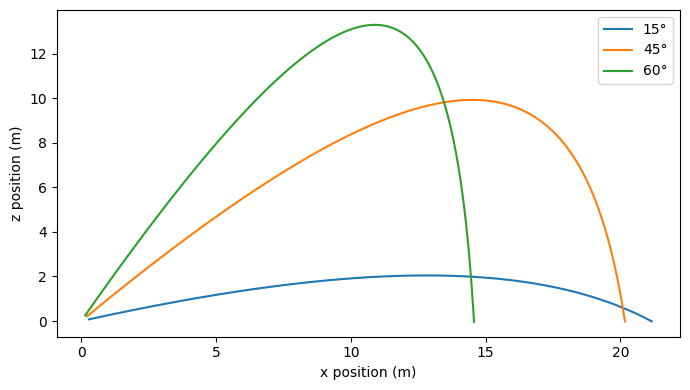

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import myode

g = 9.8
b = 1.0   # drag coefficient (1/s)
speed = 30.0  # launch speed (m/s)

# --- Define equations of motion ---
def diffeq(y):
    xpos, xvel, zpos, zvel = y
    xacc = -b*xvel   # horizontal: drag only
    zacc = -g-b*zvel    # vertical: gravity + drag
    return np.array([xvel, xacc, zvel, zacc])

# --- Simulate one trajectory and return landing x-position ---
def final_x(angle_deg, dt=0.01):
    """Run projectile from origin at given launch angle; return x at landing."""
    angle = np.radians(angle_deg)
    y = np.array([0.0, speed*np.cos(angle), 0.0, speed*np.sin(angle)])
    while y[2] >= 0:             # TODO: condition to keep simulating
        y = myode.move_RK2(diffeq, y, dt)
    return y[0]            # TODO: return landing x-position



# --- Plot trajectories for a few angles to visualize ---
fig, ax = plt.subplots(figsize=(7, 4))
for angle_deg in [15, 45, 60]:    # TODO: choose a few angles to plot
    angle = np.radians(angle_deg)
    y = np.array([0.0, speed*np.cos(angle), 0.0, speed*np.sin(angle)])
    xs, zs = [], []
    while y[2] >= 0:
        y = myode.move_RK2(diffeq, y, dt=0.01)
        xs.append(y[0]); zs.append(y[2])
    ax.plot(xs, zs, label=f'{angle_deg}°')
ax.set_xlabel('x position (m)')
ax.set_ylabel('z position (m)')
ax.legend()
plt.tight_layout()
plt.show()



**Troubleshooting tips for some common errors.**

**Q:** I'm seeing too many figures pop up.

**A:** Make sure that your "fig, ax = plt.subplots(1)" line or "plt.figure()" line are initiated only once before and outside any loop. They are responsible for creating a new plot, so if they are inside a loop you'll keep generating new figures in new windows.

**Q:** Some of my projectiles are not reaching the ground.

**A:** The simulation ended too early. Think about how to control the simulation time.

**Q:** I don't know where my projectile is and can't find it on any figure.

**A:** When in doubt, you can always print out the trajectory (xpos,zpos,etc.) in your console to look at the actual numbers. Are they not updating / going too far / going to slow? And then check back with your code.


Next lecture we'll talk about numerical methods that can solve complicated equations to directly find answers to these problems.